In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris_df = pd.read_csv("data/iris/iris.data", 
                      names=["sepal length", "sepal width", 
                             "petal length", "petal width", 
                             "class label"])

X = iris_df[["sepal length", "petal length"]].values
y = iris_df["class label"].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


sc = StandardScaler()
sc.fit(X_train) # 从训练集中获取每个特征取值的均值和标准差
X_train_std = sc.transform(X_train) # 缩放训练集特征
X_test_std = sc.transform(X_test) # 缩放测试集特征

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 绘制决策超平面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 绘制样本
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], 
                    label=f'Class {cl}', edgecolor='black')
        
        # 高亮测试样本
        if test_idx:
            # plot all examples
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', 
                        edgecolor='black', alpha=1.0, linewidth=1, 
                        marker='o', s=100, label='Test set')

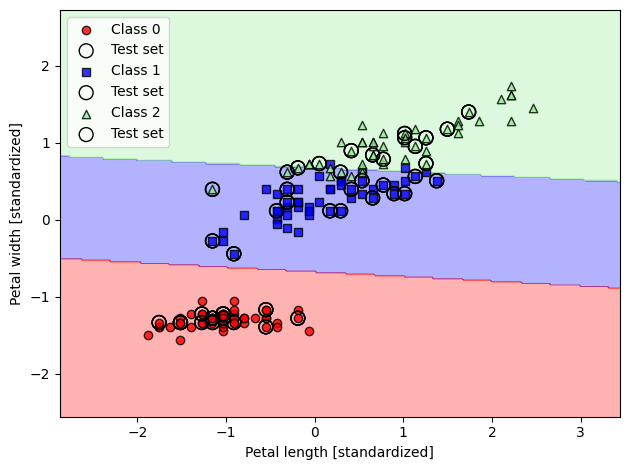

In [3]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=svm, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [4]:
from sklearn.metrics import accuracy_score

y_train_pred = svm.predict(X_train_std)
y_test_pred = svm.predict(X_test_std)

print("在训练集上的准确率 {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100))
print("在测试集上的准确率 {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))

在训练集上的准确率 94.29%
在测试集上的准确率 91.11%


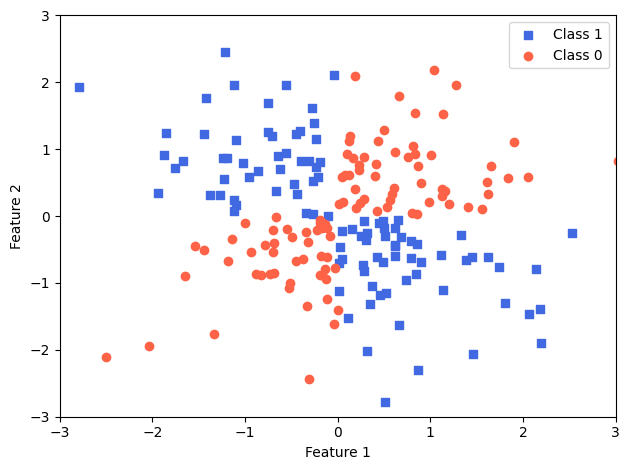

In [5]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='tomato', marker='o', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

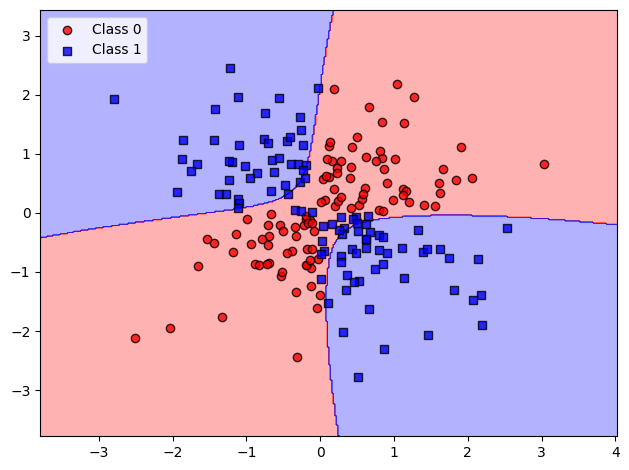

In [6]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

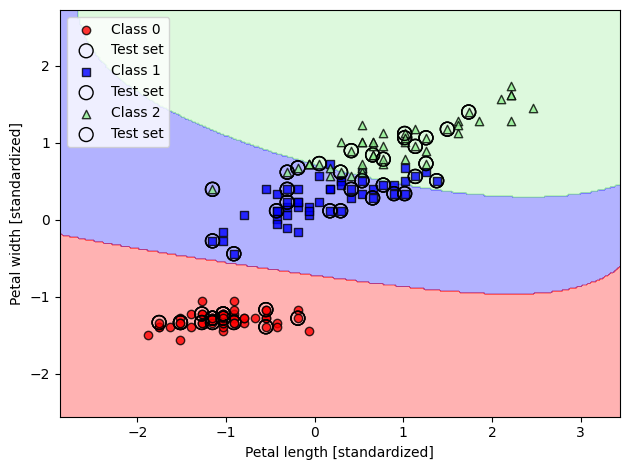

In [7]:
svm = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=svm, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

y_train_pred = svm.predict(X_train_std)
y_test_pred = svm.predict(X_test_std)

print("在训练集上的准确率 {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100))
print("在测试集上的准确率 {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))

在训练集上的准确率 90.48%
在测试集上的准确率 86.67%


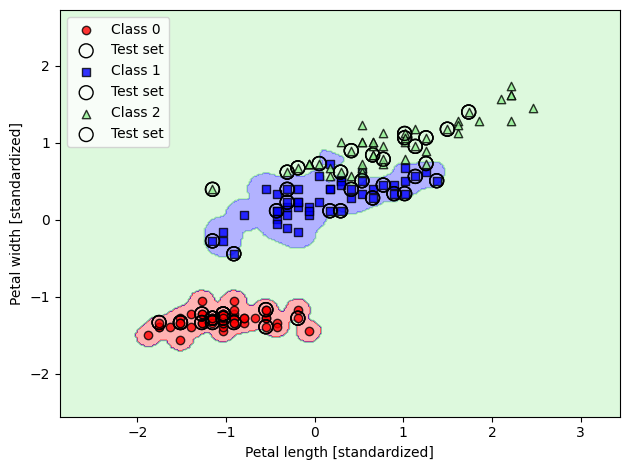

In [9]:
svm = SVC(kernel='rbf', gamma=100.0, C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=svm, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

y_train_pred = svm.predict(X_train_std)
y_test_pred = svm.predict(X_test_std)

print("在训练集上的准确率 {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100))
print("在测试集上的准确率 {:.2f}%".format(accuracy_score(y_test, y_test_pred) * 100))

在训练集上的准确率 99.05%
在测试集上的准确率 95.56%
